# Metoda konečných objemů pro advekci-difúzi ve 2D

## Úloha 1: Šíření exhalace
Továrna, která leží na čtvrtcovém půdorysu o rozměrech $200\times 200~m$, vypouští do ovzduší škodliviny v množství $1~kg/km^2/h$.
Vypočítejte metodou konečných objemů časový průběh znečištění v okolní oblasti o rozměrech $1\times 1~km$ v průběhu jedné hodiny. Uvažujte konstantní rychlost větru $1~km/h$ směrem na (a) východ, (b) severovýchod. Difúzi zanedbejte.
1. Zformulujte matematický model jako advekční rovnici s příslušnou počáteční a okrajovou podmínkou.

Vaše odpověď: rovnice + okrajová podmínka

2. Uvažujte čtvercovou síť $nx\times nx$ elementů o velikosti $h\times h$, kde $h=1/nx~km$. Elementy si vhodným způsobem očíslujte. Spočítejte pro případ (a) i (b) toky skrze strany jednoho elementu.

3. Definujte matice $\mathbb K$, $\mathbb M$ a vektor pravých stran $\mathbf f$. Spočítejte hodnotu CFL podmínky podle vzorce $CFL=\frac{\Delta t}{h}\max_i\sum_{j\in\mathcal N_i}|\tau_{ij}|$.

In [6]:
from math import *
import numpy as np

T = 1
nt = 20
dt = T/nt

L = 1
nx = 20
h = L/nx

# uhel smeru vetru
theta = 0

print('CFL = ', dt/h*(abs(cos(theta))+abs(sin(theta))))

K = np.zeros([nx*nx,nx*nx])
for i in range(nx*nx):
    K[i,i] = (abs(cos(theta))+abs(sin(theta)))/h
    if cos(theta) > 0 and i%nx > 0:
        K[i,i-1] = -cos(theta)/h
    if cos(theta) < 0 and (i+1)%nx > 0:
        K[i,i+1] = cos(theta)/h
    if sin(theta) > 0 and i/nx >= 1:
        K[i,i-nx] = -sin(theta)/h
    if sin(theta) < 0 and i/nx < nx-1:
        K[i,i+nx] = sin(theta)/h

M = np.eye(nx*nx) - dt*K

f = np.zeros([nx,nx])
f[int(nx/5)*2:int(nx/5)*3,int(nx/5)*2:int(nx/5)*3]=1
f=f.reshape(nx*nx)

CFL =  1.0


4. Definujte vektor počátečních koncentrací $\mathbf\Phi^0$. Spočtěte koncentrace v diskrétních časech $t_k$, $k=1,...,nt$. Jaké hodnoty dosahuje maximální bodová koncentrace a v jakém místě?

In [7]:
phi = np.zeros(nx*nx)
phi_time = [phi.reshape([nx,nx])]
phi_max = 0
for i in range(nt):
    phi = M@phi + dt*f
    phi_time.append(phi.reshape([nx,nx]))
    phi_max = max(phi_max, phi.max())
print('max = ', phi_max)

max =  0.2


5. Za předpokladu, že řešení jsou uložena v poli ``phi_time`` a maximální koncentrace je dána hodnotou ``phi_max``, si můžete časový průběh řešení zobrazit pomocí následujícího kódu:

In [8]:
import matplotlib.pyplot as plt
import matplotlib.animation

plt.ioff()
fig, ax = plt.subplots()
pos = ax.imshow(phi_time[0], origin='lower', vmin=0, vmax=phi_max)
fig.colorbar(pos)

def animate(i):
    pos = ax.imshow(phi_time[i], origin='lower', vmin=0, vmax=phi_max, extent=[0, L, 0, L])
    ax.set_xlabel('t='+str(i*dt))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(phi_time))

from IPython.display import HTML
HTML(ani.to_jshtml())

## Úloha 2: Stacionární advekce-difúze
Řešte předchozí problém jako stacionární. Uvažujte také difúzi s koeficientem $\alpha=10~m^2/s$.
1. Upravte definici matice $\mathbb K$ tak, aby zahrnovala difúzi.

In [9]:
theta = 0
alpha = 10*1e-6*3600

nx = 50
h = L/nx

K = np.zeros([nx*nx,nx*nx])
for i in range(nx*nx):
    # advekce
    K[i,i] = (abs(cos(theta))+abs(sin(theta)))/h
    if cos(theta) > 0 and i%nx > 0:
        K[i,i-1] = -cos(theta)/h
    if cos(theta) < 0 and (i+1)%nx > 0:
        K[i,i+1] = cos(theta)/h
    if sin(theta) > 0 and i/nx >= 1:
        K[i,i-nx] = -sin(theta)/h
    if sin(alpha) < 0 and i/nx < nx-1:
        K[i,i+nx] = sin(theta)/h
        
    # difuze
    if i%nx > 0:
        K[i,i] = K[i,i] + alpha/h**2
        K[i,i-1] = K[i,i-1] - alpha/h**2
    if (i+1)%nx > 0:
        K[i,i] = K[i,i] + alpha/h**2
        K[i,i+1] = K[i,i+1] - alpha/h**2
    if i/nx >= 1:
        K[i,i] = K[i,i] + alpha/h**2
        K[i,i-nx] = K[i,i-nx] - alpha/h**2
    if i/nx < nx-1:
        K[i,i] = K[i,i] + alpha/h**2
        K[i,i+nx] = K[i,i+nx] - alpha/h**2
        
f = np.zeros([nx,nx])
f[int(nx/5)*2:int(nx/5)*3,int(nx/5)*2:int(nx/5)*3]=1
f=f.reshape(nx*nx)

2. Spočítejte řešení pomocí soustavy lineárních rovnic $\mathbb K\mathbf\Phi=\mathbf f$. Zjistěte maximální hodnotu koncentrace.

max =  0.13951376314918995


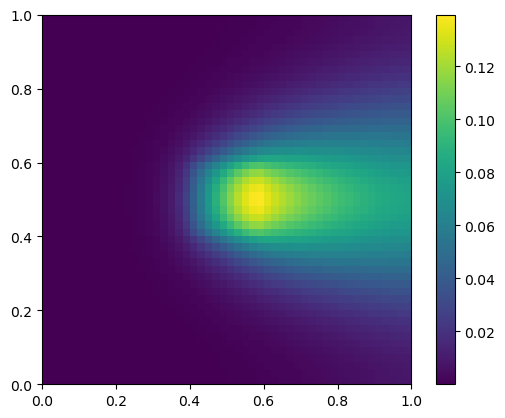

In [10]:
phi = np.linalg.solve(K,f)
print('max = ', phi.max())

plt.clf()
plt.imshow(phi.reshape([nx,nx]), origin='lower', extent=[0, L, 0, L])
plt.colorbar()
plt.show()